<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Simple_CNN_Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset from https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten


data = os.listdir('/content/drive/MyDrive/Covid19-dataset')
data

['test', 'train']

In [ ]:
print(type(os.path.join('/content/drive/MyDrive/Covid19-dataset/train')))
os.listdir(train)

<class 'str'>


['Normal', 'Covid', 'Viral Pneumonia']

In [ ]:
train = '/content/drive/MyDrive/Covid19-dataset/train'
test = '/content/drive/MyDrive/Covid19-dataset/test'
Train_dict = {'Normal':[],'Covid':[],'Viral Pneumonia':[]}
Test_dict = {'Normal':[],'Covid':[],'Viral Pneumonia':[]}

for disease in os.listdir(os.path.join(train)):
  for images in os.listdir(os.path.join(train, disease)):
    Train_dict[disease].append(os.path.join(train, disease, images))
Train_dict
for disease in os.listdir(os.path.join(test)):
  for images in os.listdir(os.path.join(test, disease)):
    Test_dict[disease].append(os.path.join(test, disease, images))

In [ ]:
# Uhmmmm create dataframe?
# dict -> take each img then append it to 1D dataframe with y = len(disease) or something
# need to preprocess first

#this is basically a copied code

import cv2 as cv

TRAIN_IMGS = {}
TEST_IMGS = {}

for folder in Train_dict.keys():
    temp = []
    for path in Train_dict[folder]:
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.blur(img, (3, 3))
        img = cv.resize(img, (32, 32))/255
        img = img.reshape(32,32,1)
        temp.append(img)
    TRAIN_IMGS[folder] = temp

for folder in Test_dict.keys():
    temp = []
    for path in Test_dict[folder]:
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.blur(img, (3, 3))
        img = cv.resize(img, (32, 32))/255
        img = img.reshape(32,32,1)
        temp.append(img)
    TEST_IMGS[folder] = temp



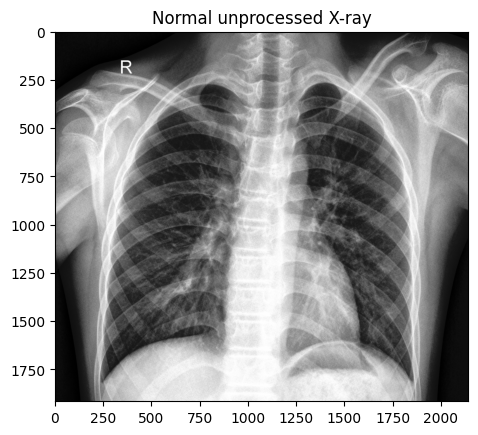

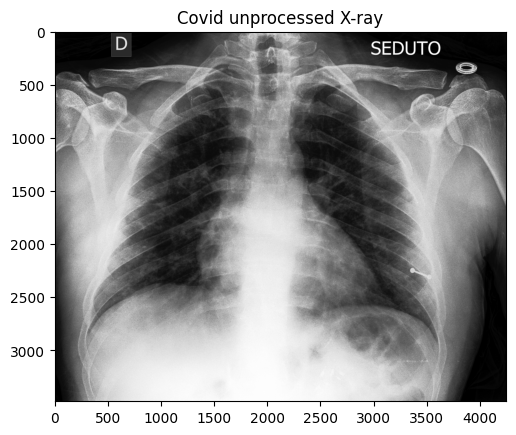

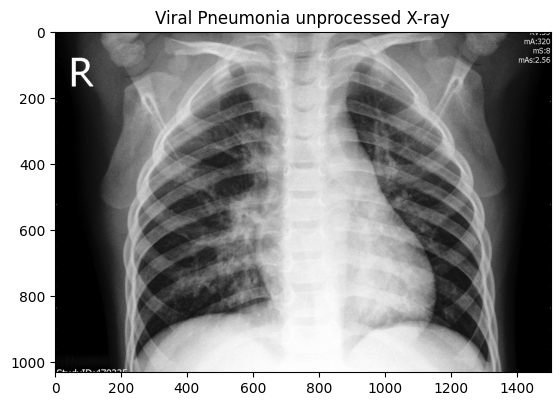

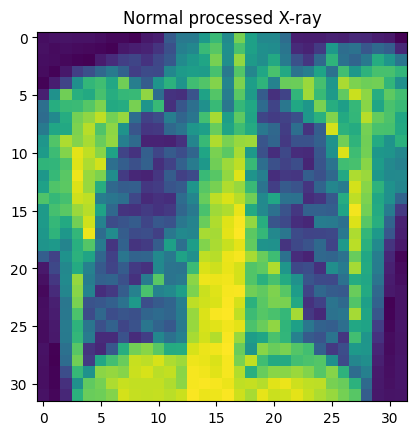

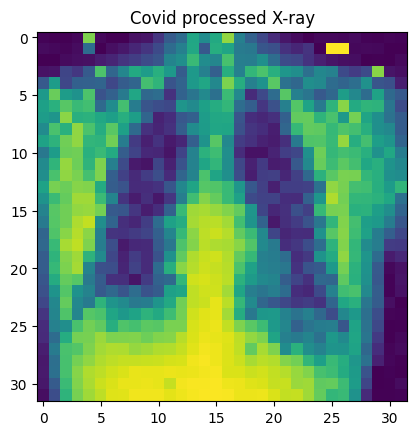

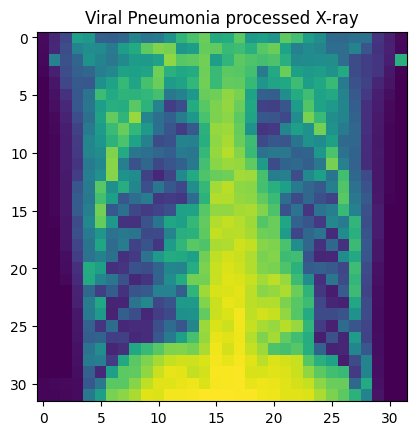

In [ ]:
for disease in Train_dict.keys():
  plt.title(f"{disease} unprocessed X-ray")
  plt.imshow(cv.imread(Train_dict[disease][0]))
  plt.show()
for disease in TRAIN_IMGS.keys():
  plt.title(f"{disease} processed X-ray")
  plt.imshow(TRAIN_IMGS[disease][0])
  plt.show()

In [ ]:
Images = []
Labels = []
for disease in TRAIN_IMGS.keys():
  for img in TRAIN_IMGS[disease]:
    Images.append(img)
    if disease == 'Normal':
      Labels.append(0)
    elif disease == 'Covid':
      Labels.append(1)
    else:
      Labels.append(2)


Images = np.array(Images)
Labels = np.array(Labels)
Labels



TensorShape([251, 32, 32, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.2, random_state=42)

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)


In [ ]:
#after we have lower the resolution, we can create our model

model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.3299 - loss: 1.1072 - val_accuracy: 0.3922 - val_loss: 1.0760
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4695 - loss: 1.0544 - val_accuracy: 0.3922 - val_loss: 1.0600
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4307 - loss: 1.0551 - val_accuracy: 0.4118 - val_loss: 1.0203
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5298 - loss: 1.0107 - val_accuracy: 0.7843 - val_loss: 0.9574
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7052 - loss: 0.8998 - val_accuracy: 0.5882 - val_loss: 0.8217
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6751 - loss: 0.7799 - val_accuracy: 0.7647 - val_loss: 0.6865
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7736 - loss: 0.6346 - val_accuracy: 0.8431 - val_loss: 0.4955
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7777 - loss: 0.5462 - val_accuracy: 0.8431 - val_loss: 0.4501


[0.2565445303916931, 0.9607843160629272]

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,619 (1.39 MB)

 Trainable params: 121,539 (474.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,080 (949.54 KB)

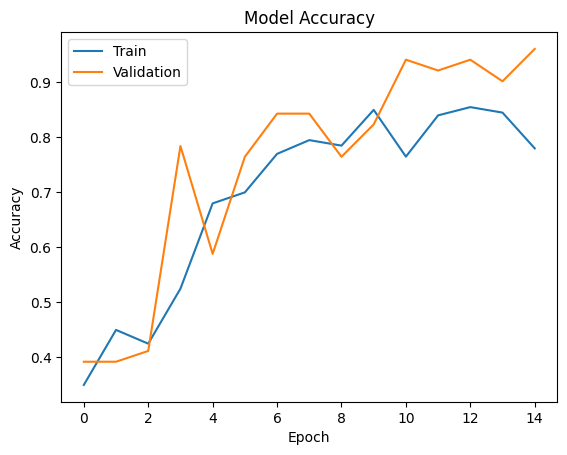

In [ ]:





plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
